In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics

import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/Colab Notebooks/svm-stem"

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.isnull().sum()

,0
File,0
ID,0
Area,0
Perimeter,0
Centroid X,0
Centroid Y,0
Extent,0
Solidity,0
Orientation,0
Major Axis,0


In [ ]:
test.isnull().sum()

,0
File,0
ID,0
Area,0
Perimeter,0
Centroid X,0
Centroid Y,0
Extent,0
Solidity,0
Orientation,0
Major Axis,0


In [ ]:
# "Number of Protrusions" , "Area" , "Min. intensity" , "Change in Centroid" , "Major Axis" , "Minor Axis" , "Orientation" , "Solidity"
columns_to_keep = ["Number of Protrusions", "Area", "Min. intensity", "Change in Centroid", "Major Axis", "Minor Axis", "Orientation", "Solidity", "Label"]
train = train[columns_to_keep]
test = test[columns_to_keep]

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
X_train = train.drop(columns=['Label'])
y_train = train['Label']
X_test = test.drop(columns=['Label'])
y_test = test['Label']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# svm_clf = SVC(kernel='linear', probability=True)  # Set probability=True for ROC-AUC
# svm_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

************************

In [ ]:
from sklearn import svm

svc = svm.SVC()
svc = svm.SVC(probability=True, random_state=1)

In [ ]:
from sklearn import model_selection
search_grid = [
            {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
            {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
            'kernel': ['rbf']}
            ]

scorer = 'accuracy'

search_func = model_selection.GridSearchCV(estimator=svc,
                                        param_grid=search_grid,
                                        scoring=scorer,
                                        n_jobs=-1,
                                        cv=5)

In [ ]:
# import scipy.stats as stats
# from sklearn.utils.fixes import loguniform
# from sklearn import model_selection

# search_dict = {'kernel': ['linear', 'rbf'],
#                'C': loguniform(1, 1000),
#                'gamma': loguniform(0.0001, 0.1)
#                }

# scorer = 'accuracy'

# search_func = model_selection.RandomizedSearchCV(estimator=svc,
#                                                  param_distributions=search_dict,
#                                                  n_iter=6,
#                                                  scoring=scorer,
#                                                  n_jobs=-1,
#                                                  cv=5
#                                                  )

In [ ]:
search_func.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=1), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [ ]:
print (search_func.best_params_)
print (search_func.best_score_)

************************

In [ ]:
y_pred = svm_clf.predict(X_test)
y_prob = svm_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.7915224913494809
Precision: 0.8140981340704907
Recall: 0.7218137254901961
F1 Score: 0.7651835011367328
ROC-AUC Score: 0.8881276298645819


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1836
           1       0.81      0.72      0.77      1632

    accuracy                           0.79      3468
   macro avg       0.79      0.79      0.79      3468
weighted avg       0.79      0.79      0.79      3468



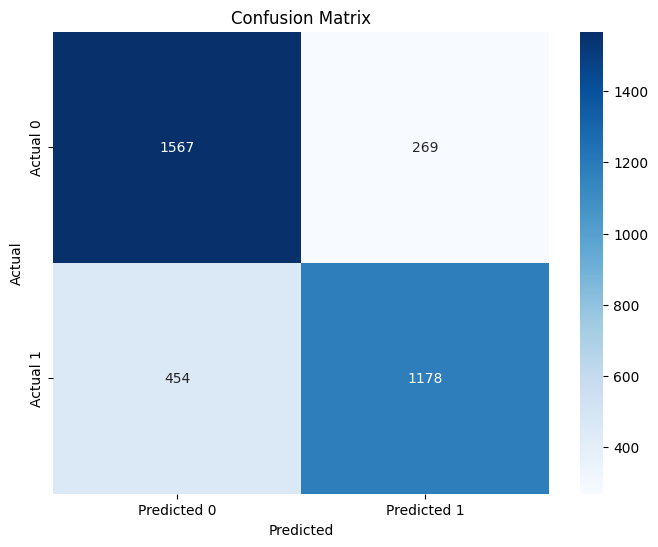

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

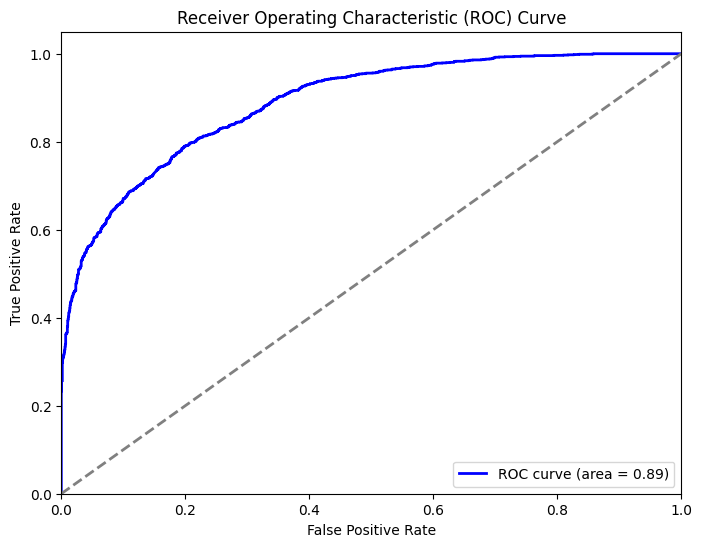

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()